<a href="https://colab.research.google.com/github/jumpingsphinx/ESE2030/blob/main/ESE2030ColabWeek9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

Random matrix A:
[[ 1. -2.]
 [ 5.  2.]
 [-1.  1.]]

Polar decomposition:
Q (unitary part):
[[ 0.33178442 -0.79833688]
 [ 0.90422112  0.42098638]
 [-0.26889267  0.43061432]]

H (positive semidefinite Hermitian part):
[[5.12178268 0.87598071]
 [0.87598071 2.86926084]]


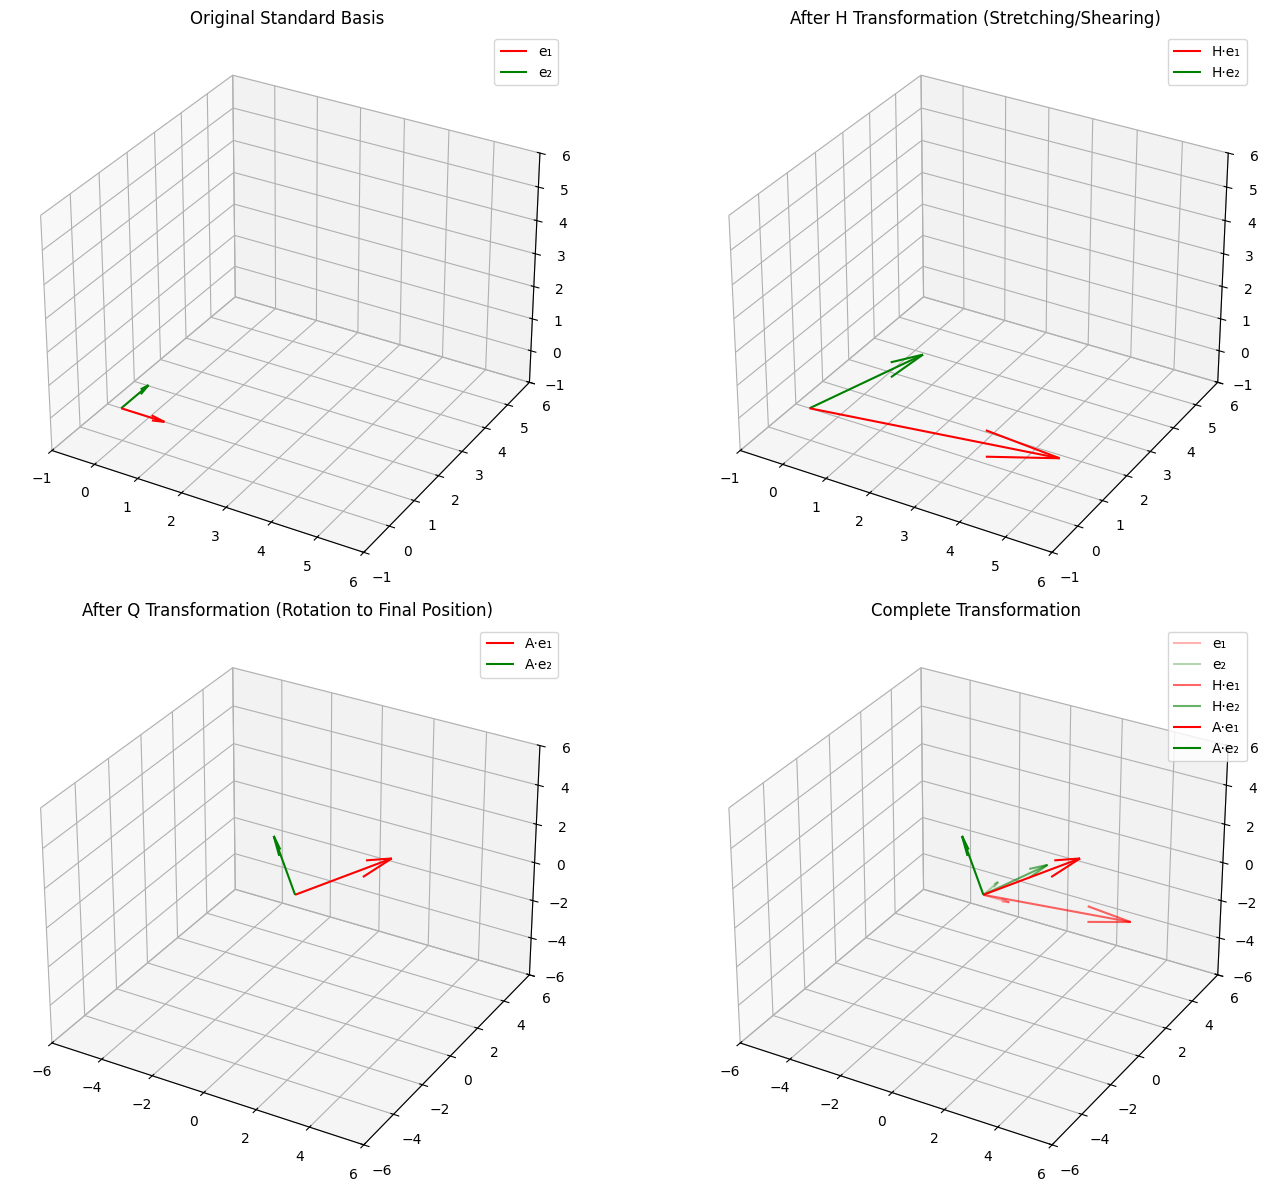


Animation saved as 'polar_decomposition_animation.gif' and static views as 'polar_decomposition_static.png'

Geometric interpretation:
1. H transforms the standard basis by stretching and possibly shearing (remains in the plane)
2. Q then rotates/reflects the H-transformed vectors to their final position in 3D space
This illustrates how A = QH decomposes the transformation into a 'shape change' (H)
followed by a 'orientation change' (Q)


In [13]:
# Step 1: Generate a random 3x2 matrix with nonzero integers between -5 and 5
def generate_nonzero_random_matrix(rows, cols, min_val, max_val):
    # Create a matrix of zeros
    matrix = np.zeros((rows, cols))

    # Fill with random nonzero integers in the specified range
    for i in range(rows):
        for j in range(cols):
            # Generate random integers until we get a nonzero value
            while matrix[i, j] == 0:
                matrix[i, j] = np.random.randint(min_val, max_val + 1)

    return matrix

# Generate the random matrix A
A = generate_nonzero_random_matrix(3, 2, -5, 5)
print("Random matrix A:")
print(A)

# Step 2: Compute the polar decomposition A = QH
U, s, Vh = linalg.svd(A, full_matrices=False)
Q = U @ Vh  # This is the unitary (or partial isometry) part
H = Vh.T @ np.diag(s) @ Vh  # This is the positive semidefinite Hermitian part

print("\nPolar decomposition:")
print("Q (unitary part):")
print(Q)
print("\nH (positive semidefinite Hermitian part):")
print(H)

# Standard basis vectors in R^2
e1 = np.array([1, 0])
e2 = np.array([0, 1])
std_basis = [e1, e2]

# Step 3 and 4: Animate the action of H and then Q on the standard basis
def create_animation():
    # Set up the 3D figure
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Original basis vectors (in R^2, but plotted in R^3 with z=0)
    vectors_original = np.vstack([e1, e2])
    x_orig = np.array([0, vectors_original[0, 0], 0, vectors_original[1, 0]])
    y_orig = np.array([0, vectors_original[0, 1], 0, vectors_original[1, 1]])
    z_orig = np.zeros(4)

    # After H transformation
    vectors_H = np.vstack([H @ e1, H @ e2])
    x_H = np.array([0, vectors_H[0, 0], 0, vectors_H[1, 0]])
    y_H = np.array([0, vectors_H[0, 1], 0, vectors_H[1, 1]])
    z_H = np.zeros(4)

    # After Q transformation (A = QH)
    vectors_QH = np.vstack([A @ e1, A @ e2])
    x_QH = np.array([0, vectors_QH[0, 0], 0, vectors_QH[1, 0]])
    y_QH = np.array([0, vectors_QH[0, 1], 0, vectors_QH[1, 1]])
    z_QH = np.array([0, vectors_QH[0, 2], 0, vectors_QH[1, 2]])  # Now in R^3

    # Plot setup
    lines_orig = [ax.plot(x_orig[0:2], y_orig[0:2], z_orig[0:2], 'r-', linewidth=2, label='e₁')[0],
                 ax.plot(x_orig[2:4], y_orig[2:4], z_orig[2:4], 'g-', linewidth=2, label='e₂')[0]]

    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-6, 6])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    text = ax.text2D(0.05, 0.95, "Original Standard Basis", transform=ax.transAxes)

    # Animation function
    def animate(frame):
        if frame < 30:  # First 30 frames: original basis to H-transformed
            t = frame / 30.0
            # Interpolate between original and H-transformed
            x = (1 - t) * x_orig + t * x_H
            y = (1 - t) * y_orig + t * y_H
            z = np.zeros(4)
            text.set_text(f"Transformation by H: {t*100:.0f}%")
        else:  # Next 30 frames: H-transformed to QH-transformed (final A)
            t = (frame - 30) / 30.0
            # Interpolate between H-transformed and QH-transformed
            x = (1 - t) * x_H + t * x_QH
            y = (1 - t) * y_H + t * y_QH
            z = t * z_QH  # Z coordinate increases as we apply Q
            text.set_text(f"Transformation by Q after H: {t*100:.0f}%")

        # Update line positions
        lines_orig[0].set_data(x[0:2], y[0:2])
        lines_orig[0].set_3d_properties(z[0:2])
        lines_orig[1].set_data(x[2:4], y[2:4])
        lines_orig[1].set_3d_properties(z[2:4])

        # Change title
        if frame == 0:
            ax.set_title("Original Standard Basis")
        elif frame == 30:
            ax.set_title("After H Transformation (Stretch/Rotate in Plane)")
        elif frame == 59:
            ax.set_title("After Q Transformation (Rotation to Final Position)")

        return lines_orig + [text]

    ani = FuncAnimation(fig, animate, frames=60, interval=100, blit=False)

    # Save the animation
    ani.save('polar_decomposition_animation.gif', writer='pillow', fps=15)

    plt.close()

    # Create a second figure with static representations
    fig = plt.figure(figsize=(15, 12))

    # Original basis
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.quiver(0, 0, 0, e1[0], e1[1], 0, color='r', label='e₁')
    ax1.quiver(0, 0, 0, e2[0], e2[1], 0, color='g', label='e₂')
    ax1.set_title("Original Standard Basis")
    ax1.set_xlim([-1, 6])
    ax1.set_ylim([-1, 6])
    ax1.set_zlim([-1, 6])
    ax1.legend()

    # After H transformation
    ax2 = fig.add_subplot(222, projection='3d')
    h_e1 = H @ e1
    h_e2 = H @ e2
    ax2.quiver(0, 0, 0, h_e1[0], h_e1[1], 0, color='r', label='H⋅e₁')
    ax2.quiver(0, 0, 0, h_e2[0], h_e2[1], 0, color='g', label='H⋅e₂')
    ax2.set_title("After H Transformation (Stretching/Shearing)")
    ax2.set_xlim([-1, 6])
    ax2.set_ylim([-1, 6])
    ax2.set_zlim([-1, 6])
    ax2.legend()

    # After Q transformation
    ax3 = fig.add_subplot(223, projection='3d')
    a_e1 = A @ e1
    a_e2 = A @ e2
    ax3.quiver(0, 0, 0, a_e1[0], a_e1[1], a_e1[2], color='r', label='A⋅e₁')
    ax3.quiver(0, 0, 0, a_e2[0], a_e2[1], a_e2[2], color='g', label='A⋅e₂')
    ax3.set_title("After Q Transformation (Rotation to Final Position)")
    ax3.set_xlim([-6, 6])
    ax3.set_ylim([-6, 6])
    ax3.set_zlim([-6, 6])
    ax3.legend()

    # Combined view
    ax4 = fig.add_subplot(224, projection='3d')
    # Original basis
    ax4.quiver(0, 0, 0, e1[0], e1[1], 0, color='r', alpha=0.3, label='e₁')
    ax4.quiver(0, 0, 0, e2[0], e2[1], 0, color='g', alpha=0.3, label='e₂')
    # H-transformed basis
    ax4.quiver(0, 0, 0, h_e1[0], h_e1[1], 0, color='r', alpha=0.6, label='H⋅e₁')
    ax4.quiver(0, 0, 0, h_e2[0], h_e2[1], 0, color='g', alpha=0.6, label='H⋅e₂')
    # Q⋅H (A) transformed basis
    ax4.quiver(0, 0, 0, a_e1[0], a_e1[1], a_e1[2], color='r', label='A⋅e₁')
    ax4.quiver(0, 0, 0, a_e2[0], a_e2[1], a_e2[2], color='g', label='A⋅e₂')
    ax4.set_title("Complete Transformation")
    ax4.set_xlim([-6, 6])
    ax4.set_ylim([-6, 6])
    ax4.set_zlim([-6, 6])
    ax4.legend()

    plt.tight_layout()
    plt.savefig('polar_decomposition_static.png')
    plt.show()
    plt.close()

    return "Animation saved as 'polar_decomposition_animation.gif' and static views as 'polar_decomposition_static.png'"

# Run the animation creation
animation_result = create_animation()
print("\n" + animation_result)

# Print additional information
print("\nGeometric interpretation:")
print("1. H transforms the standard basis by stretching and possibly shearing (remains in the plane)")
print("2. Q then rotates/reflects the H-transformed vectors to their final position in 3D space")
print("This illustrates how A = QH decomposes the transformation into a 'shape change' (H)")
print("followed by a 'orientation change' (Q)")


Singular Value Decomposition A = U Σ V^T:
U (left singular vectors):
[[-0.0547366   0.86280159  0.50257071]
 [-0.99190394 -0.10474705  0.07179582]
 [ 0.11458834 -0.49457201  0.86154979]]

Σ (singular values):
[5.42233845 2.56870507]

V^T (right singular vectors transposed):
[[-0.9458732  -0.32453643]
 [ 0.32453643 -0.9458732 ]]

V (right singular vectors as columns):
[[-0.9458732   0.32453643]
 [-0.32453643 -0.9458732 ]]


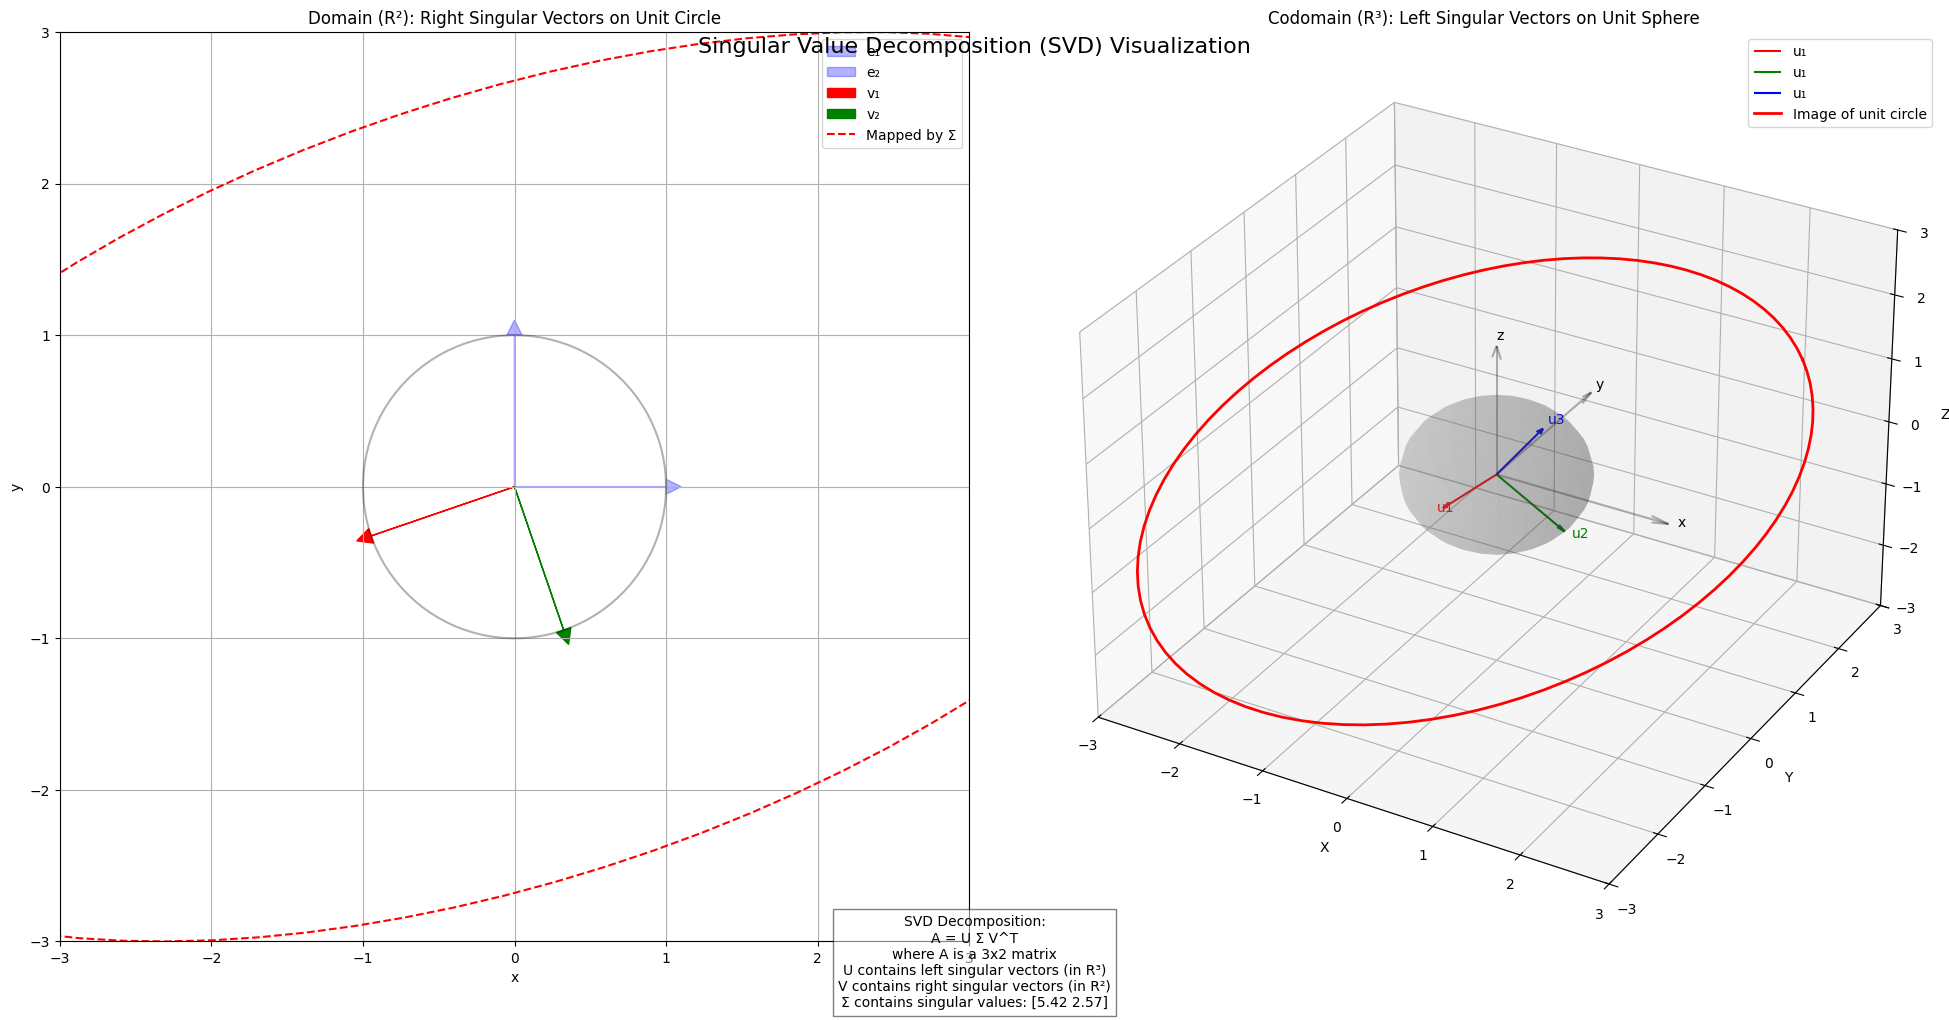

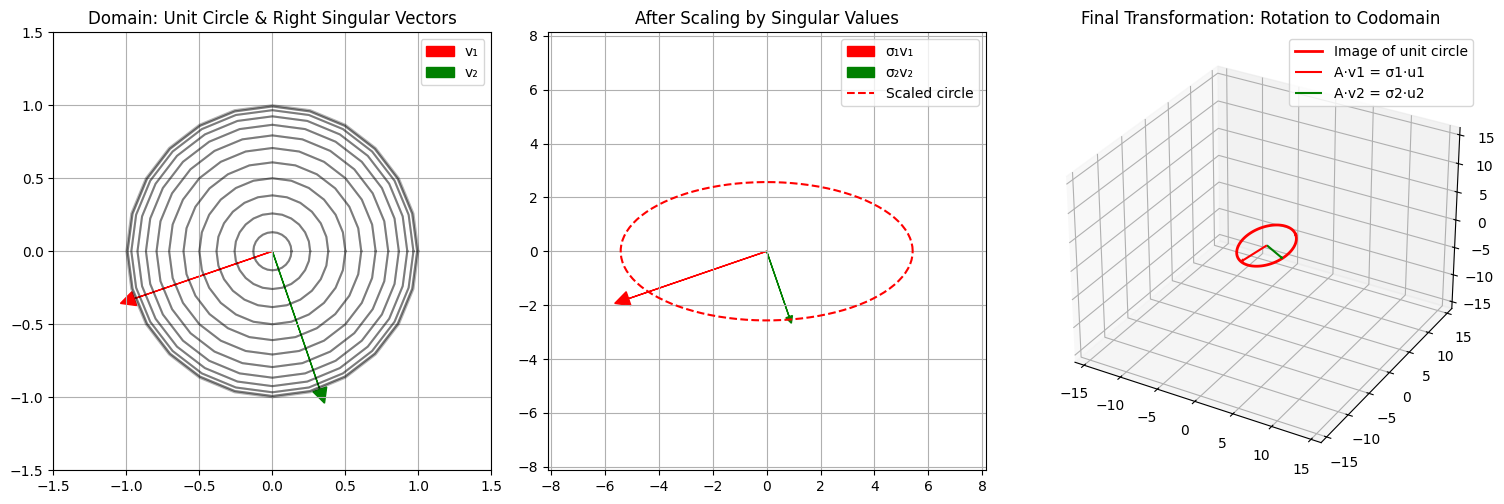


Visualization completed. Two figures have been saved:
1. 'svd_visualization.png' - Showing the singular vectors in domain and codomain
2. 'svd_transformation_steps.png' - Illustrating the SVD transformation process step by step


In [15]:
# 5. Compute the full SVD of A = U Σ V^T
U, Sigma, VT = linalg.svd(A, full_matrices=True)
print("\nSingular Value Decomposition A = U Σ V^T:")
print("U (left singular vectors):")
print(U)
print("\nΣ (singular values):")
print(Sigma)
print("\nV^T (right singular vectors transposed):")
print(VT)
print("\nV (right singular vectors as columns):")
V = VT.T
print(V)

# Create figure for visualization
fig = plt.figure(figsize=(20, 10))

# 6. Draw the right singular vectors on the unit circle in the domain (R²)
ax1 = fig.add_subplot(121)
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
ax1.plot(x, y, 'k-', alpha=0.3)  # Unit circle

# Original basis vectors
ax1.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue', alpha=0.3, label='e₁')
ax1.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='blue', ec='blue', alpha=0.3, label='e₂')

# Right singular vectors (columns of V)
ax1.arrow(0, 0, V[0, 0], V[1, 0], head_width=0.1, head_length=0.1, fc='red', ec='red', label=f'v₁')
ax1.arrow(0, 0, V[0, 1], V[1, 1], head_width=0.1, head_length=0.1, fc='green', ec='green', label=f'v₂')

# Transformed unit vectors to show the ellipse
n_points = 100
circle_points = np.array([np.cos(theta), np.sin(theta)])
transformed_points = np.zeros((2, n_points))

for i in range(n_points):
    transformed_points[:, i] = V @ np.diag(Sigma[:2]) @ circle_points[:, i]

ax1.plot(transformed_points[0, :], transformed_points[1, :], 'r--', label='Mapped by Σ')

# Plot settings
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Domain (R²): Right Singular Vectors on Unit Circle')
ax1.legend()

# 7. Draw the left singular vectors on the unit sphere in the codomain (R³)
ax2 = fig.add_subplot(122, projection='3d')

# Create a unit sphere
u = np.linspace(0, 2 * np.pi, 25)
v = np.linspace(0, np.pi, 25)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax2.plot_surface(x, y, z, color='gray', alpha=0.2)

# Draw coordinate axes
ax2.quiver(0, 0, 0, 2, 0, 0, color='k', arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(0, 0, 0, 0, 2, 0, color='k', arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(0, 0, 0, 0, 0, 2, color='k', arrow_length_ratio=0.1, alpha=0.3)
ax2.text(2.1, 0, 0, 'x', color='k')
ax2.text(0, 2.1, 0, 'y', color='k')
ax2.text(0, 0, 2.1, 'z', color='k')

# Left singular vectors (columns of U)
colors = ['red', 'green', 'blue']
for i in range(3):
    ax2.quiver(0, 0, 0, U[0, i], U[1, i], U[2, i], color=colors[i],
               arrow_length_ratio=0.1, label=f'u₁')
    ax2.text(U[0, i]*1.1, U[1, i]*1.1, U[2, i]*1.1, f'u{i+1}', color=colors[i])

# Draw the image of the unit circle under A
theta_fine = np.linspace(0, 2*np.pi, 100)
circle_points_fine = np.array([np.cos(theta_fine), np.sin(theta_fine)])
image_points = np.zeros((3, 100))

for i in range(100):
    image_points[:, i] = A @ circle_points_fine[:, i]

ax2.plot(image_points[0, :], image_points[1, :], image_points[2, :], 'r-', linewidth=2, label='Image of unit circle')

# Plot settings
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Codomain (R³): Left Singular Vectors on Unit Sphere')
ax2.legend()

# Add an explanation
textstr = '\n'.join([
    'SVD Decomposition:',
    'A = U Σ V^T',
    f'where A is a {A.shape[0]}x{A.shape[1]} matrix',
    'U contains left singular vectors (in R³)',
    'V contains right singular vectors (in R²)',
    'Σ contains singular values: ' + str(np.round(Sigma, 2))
])

fig.text(0.5, 0.01, textstr, ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make room for the text
plt.suptitle('Singular Value Decomposition (SVD) Visualization', fontsize=16)

# Save the figure
plt.show()

# Additional visualization: Show how the vectors are transformed
fig = plt.figure(figsize=(15, 5))

# Domain visualization: unit circle and right singular vectors
ax1 = fig.add_subplot(131)
ax1.plot(x, y, 'k-', alpha=0.3)  # Unit circle
# Plot right singular vectors
ax1.arrow(0, 0, V[0, 0], V[1, 0], head_width=0.1, head_length=0.1, fc='red', ec='red', label=f'v₁')
ax1.arrow(0, 0, V[0, 1], V[1, 1], head_width=0.1, head_length=0.1, fc='green', ec='green', label=f'v₂')
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_title('Domain: Unit Circle & Right Singular Vectors')
ax1.legend()

# Intermediate step: Scaling by singular values
ax2 = fig.add_subplot(132)
# Scale the right singular vectors by singular values
scaled_v1 = Sigma[0] * np.array([V[0, 0], V[1, 0]])
scaled_v2 = Sigma[1] * np.array([V[0, 1], V[1, 1]])
# Plot the scaled vectors
ax2.arrow(0, 0, scaled_v1[0], scaled_v1[1], head_width=0.1*Sigma[0], head_length=0.1*Sigma[0],
          fc='red', ec='red', label=f'σ₁v₁')
ax2.arrow(0, 0, scaled_v2[0], scaled_v2[1], head_width=0.1*Sigma[1], head_length=0.1*Sigma[1],
          fc='green', ec='green', label=f'σ₂v₂')
# Draw the ellipse formed by scaling the unit circle
ellipse_points = np.zeros((2, 100))
for i in range(100):
    ellipse_points[:, i] = np.diag(Sigma[:2]) @ circle_points[:, i]
ax2.plot(ellipse_points[0, :], ellipse_points[1, :], 'r--', label='Scaled circle')
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_xlim([-max(Sigma)*1.5, max(Sigma)*1.5])
ax2.set_ylim([-max(Sigma)*1.5, max(Sigma)*1.5])
ax2.set_title('After Scaling by Singular Values')
ax2.legend()

# Final visualization: rotation to the codomain
ax3 = fig.add_subplot(133, projection='3d')
# Plot the image of the unit circle
ax3.plot(image_points[0, :], image_points[1, :], image_points[2, :], 'r-', linewidth=2, label='Image of unit circle')

# Plot the left singular vectors scaled by singular values
for i in range(2):  # Only plot for the non-zero singular values
    # Calculate the endpoint of the transformed right singular vector
    end_point = A @ np.array([V[0, i], V[1, i]])
    ax3.quiver(0, 0, 0, end_point[0], end_point[1], end_point[2], color=colors[i],
               arrow_length_ratio=0.1, label=f'A·v{i+1} = σ{i+1}·u{i+1}')

ax3.set_xlim([-max(Sigma)*3, max(Sigma)*3])
ax3.set_ylim([-max(Sigma)*3, max(Sigma)*3])
ax3.set_zlim([-max(Sigma)*3, max(Sigma)*3])
ax3.set_title('Final Transformation: Rotation to Codomain')
ax3.legend()

plt.tight_layout()
plt.show()

print("\nVisualization completed.")


SVD components:
U (left singular vectors):
[[-0.0547366   0.86280159  0.50257071]
 [-0.99190394 -0.10474705  0.07179582]
 [ 0.11458834 -0.49457201  0.86154979]]

Σ (singular values):
[5.42233845 2.56870507]

V^T (right singular vectors transposed):
[[-0.9458732  -0.32453643]
 [ 0.32453643 -0.9458732 ]]

V (right singular vectors as columns):
[[-0.9458732   0.32453643]
 [-0.32453643 -0.9458732 ]]
Animation complete! Files saved as 'svd_rotations_animation.gif' and 'svd_rotations_final.png'


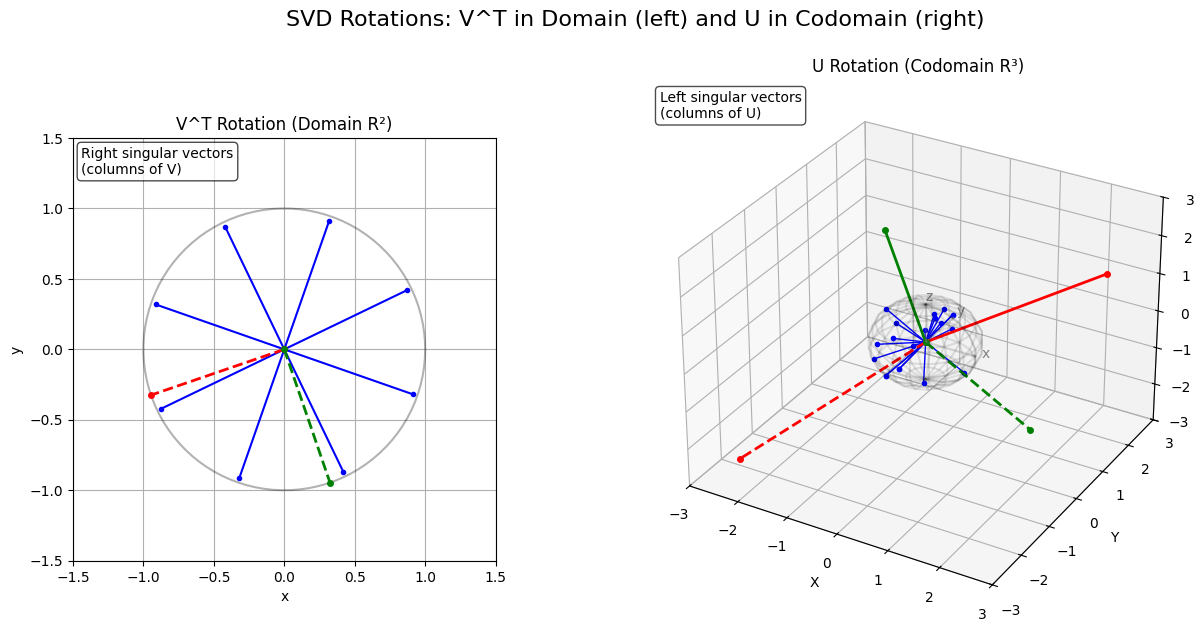

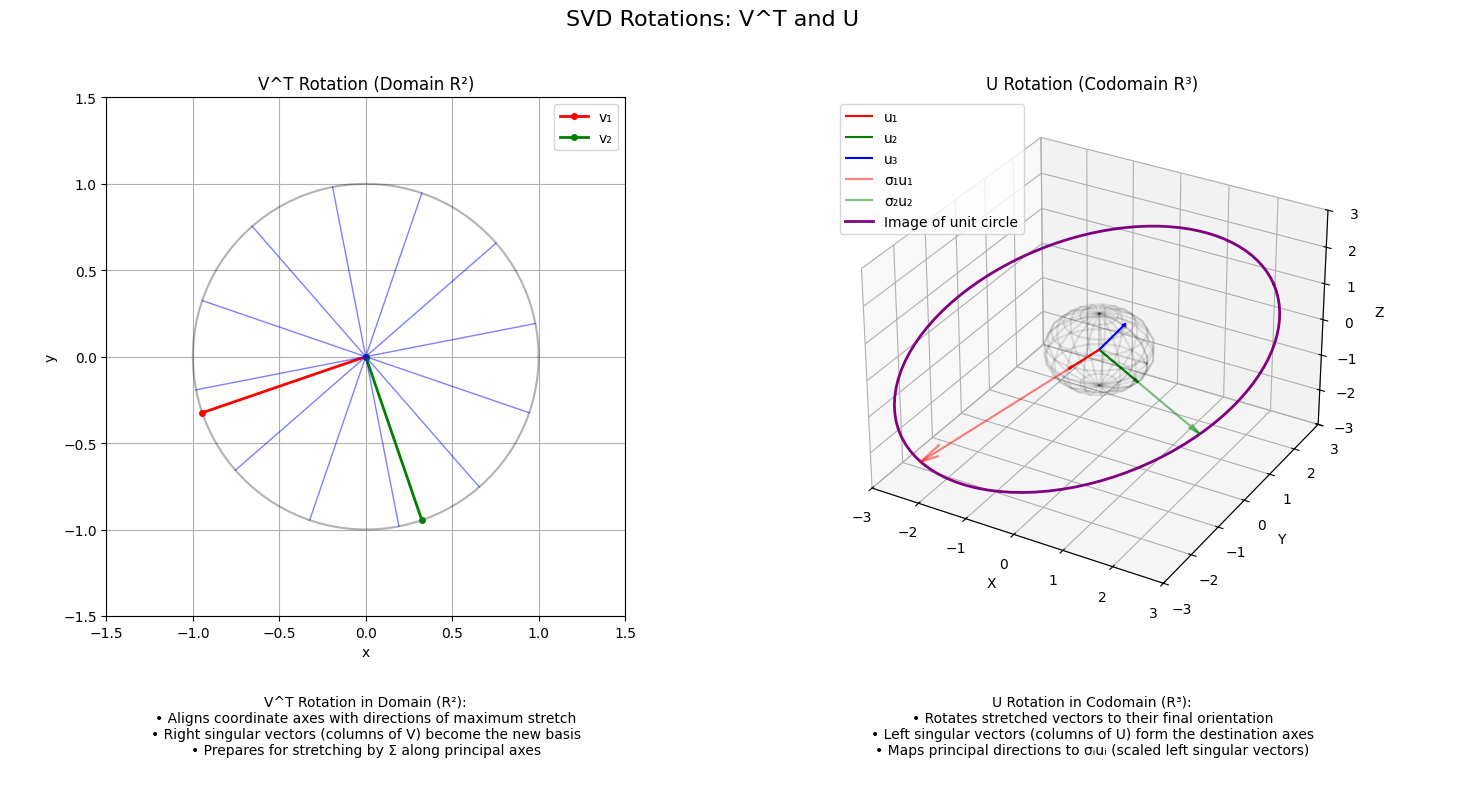

In [18]:
# Compute the SVD of A = U Σ V^T
U, Sigma, VT = linalg.svd(A, full_matrices=True)
V = VT.T  # Convert V^T to V for easier handling
print("\nSVD components:")
print("U (left singular vectors):")
print(U)
print("\nΣ (singular values):")
print(Sigma)
print("\nV^T (right singular vectors transposed):")
print(VT)
print("\nV (right singular vectors as columns):")
print(V)

# Create animation to illustrate the rotations V^T and U
def create_animation():
    # Create figure with two subplots side by side
    fig = plt.figure(figsize=(15, 7))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5])

    # Left subplot for the V^T rotation (domain R²)
    ax1 = plt.subplot(gs[0])

    # Right subplot for the U rotation (codomain R³)
    ax2 = plt.subplot(gs[1], projection='3d')

    # Plot title
    plt.suptitle('SVD Rotations: V^T in Domain (left) and U in Codomain (right)', fontsize=16)

    # Setup for domain (R²) plot
    # Unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    x_circle = np.cos(theta)
    y_circle = np.sin(theta)

    # Standard basis vectors
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])

    # Create unit vectors at equally spaced angles for the animation
    n_vectors = 8
    angles = np.linspace(0, 2*np.pi, n_vectors, endpoint=False)
    vectors = np.array([np.cos(angles), np.sin(angles)])

    # Initial state: standard basis
    domain_circle, = ax1.plot(x_circle, y_circle, 'k-', alpha=0.3)

    # Vectors to animate in domain
    domain_vectors = []
    for i in range(n_vectors):
        vector, = ax1.plot([0, vectors[0, i]], [0, vectors[1, i]], 'b-', lw=1.5,
                          marker='o', markersize=3)
        domain_vectors.append(vector)

    # Standard basis vectors are red and green
    std_basis1, = ax1.plot([0, 1], [0, 0], 'r-', lw=2, marker='o', markersize=4, label='e₁')
    std_basis2, = ax1.plot([0, 0], [0, 1], 'g-', lw=2, marker='o', markersize=4, label='e₂')

    # Initial state: V basis vectors (will be revealed in animation)
    v_basis1, = ax1.plot([0, V[0, 0]], [0, V[1, 0]], 'r--', lw=2, marker='o', markersize=4, alpha=0, label='v₁')
    v_basis2, = ax1.plot([0, V[0, 1]], [0, V[1, 1]], 'g--', lw=2, marker='o', markersize=4, alpha=0, label='v₂')

    # Plot settings for domain
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_xlim([-1.5, 1.5])
    ax1.set_ylim([-1.5, 1.5])
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('V^T Rotation (Domain R²)')

    # Setup for codomain (R³) plot
    # Create a unit sphere wireframe
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 10)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the wireframe sphere
    codomain_sphere = ax2.plot_wireframe(x_sphere, y_sphere, z_sphere, color='k', alpha=0.1)

    # Standard basis vectors in R³
    ax2.quiver(0, 0, 0, 1, 0, 0, color='gray', arrow_length_ratio=0.1, alpha=0.3)
    ax2.quiver(0, 0, 0, 0, 1, 0, color='gray', arrow_length_ratio=0.1, alpha=0.3)
    ax2.quiver(0, 0, 0, 0, 0, 1, color='gray', arrow_length_ratio=0.1, alpha=0.3)
    ax2.text(1.1, 0, 0, 'x', color='gray')
    ax2.text(0, 1.1, 0, 'y', color='gray')
    ax2.text(0, 0, 1.1, 'z', color='gray')

    # Create vectors on the unit sphere for animation
    n_sphere_vectors = 20

    # Spherical coordinates for points on the sphere
    phi = np.linspace(0, np.pi, n_sphere_vectors//2)
    theta_sphere = np.linspace(0, 2*np.pi, n_sphere_vectors//2)

    # Convert to cartesian coordinates
    x_points = np.outer(np.sin(phi), np.cos(theta_sphere)).flatten()
    y_points = np.outer(np.sin(phi), np.sin(theta_sphere)).flatten()
    z_points = np.outer(np.cos(phi), np.ones_like(theta_sphere)).flatten()

    # Keep only some points for cleaner visualization
    indices = np.random.choice(len(x_points), n_sphere_vectors, replace=False)
    x_points = x_points[indices]
    y_points = y_points[indices]
    z_points = z_points[indices]

    # Vectors to animate in codomain
    codomain_vectors = []
    for i in range(n_sphere_vectors):
        vector, = ax2.plot([0, x_points[i]], [0, y_points[i]], [0, z_points[i]],
                           'b-', lw=1, marker='o', markersize=3)
        codomain_vectors.append(vector)

    # Initial state: Transformed standard basis vectors (these will be revealed)
    # Calculate where e₁ and e₂ would map to under A
    Ae1 = A @ e1
    Ae2 = A @ e2

    # Standard basis vectors are red and green
    std_image1, = ax2.plot([0, Ae1[0]], [0, Ae1[1]], [0, Ae1[2]],
                          'r-', lw=2, marker='o', markersize=4, alpha=0, label='A·e₁')
    std_image2, = ax2.plot([0, Ae2[0]], [0, Ae2[1]], [0, Ae2[2]],
                          'g-', lw=2, marker='o', markersize=4, alpha=0, label='A·e₂')

    # Initial state: U basis vectors (will be revealed in animation)
    # Scale U vectors by singular values to show where V basis vectors map to
    u_basis1, = ax2.plot([0, Sigma[0]*U[0, 0]], [0, Sigma[0]*U[1, 0]], [0, Sigma[0]*U[2, 0]],
                       'r--', lw=2, marker='o', markersize=4, alpha=0, label='σ₁·u₁')
    u_basis2, = ax2.plot([0, Sigma[1]*U[0, 1]], [0, Sigma[1]*U[1, 1]], [0, Sigma[1]*U[2, 1]],
                       'g--', lw=2, marker='o', markersize=4, alpha=0, label='σ₂·u₂')

    # Plot settings for codomain
    ax2.set_xlim([-3, 3])
    ax2.set_ylim([-3, 3])
    ax2.set_zlim([-3, 3])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('U Rotation (Codomain R³)')

    # Text for explanation
    domain_text = ax1.text(0.02, 0.98, '', transform=ax1.transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    codomain_text = ax2.text2D(0.02, 0.98, '', transform=ax2.transAxes,
                              verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    # Animation function
    def animate(frame):
        if frame < 60:  # First 60 frames: show V^T rotation in domain
            t = frame / 60.0

            # Update domain explanation
            if frame < 10:
                domain_text.set_text("Starting with standard basis\nand unit vectors")
            elif frame < 30:
                domain_text.set_text("Rotating to align with\nright singular vectors (V)")
            else:
                domain_text.set_text("Aligned with right singular vectors\n(columns of V)")

            # Gradually rotate the vectors in the domain
            for i in range(n_vectors):
                # Original vector
                orig_vec = vectors[:, i]

                # Interpolate between original and V^T-rotated vectors
                # V^T rotates vectors to align with the principal directions
                rotated_vec = (1-t) * orig_vec + t * (VT @ orig_vec)

                # Update the vectors
                domain_vectors[i].set_data([0, rotated_vec[0]], [0, rotated_vec[1]])

            # Fade in the V basis vectors
            if frame >= 30:
                alpha = min(1.0, (frame - 30) / 20.0)
                v_basis1.set_alpha(alpha)
                v_basis2.set_alpha(alpha)

                # Fade out standard basis
                std_basis1.set_alpha(1 - alpha)
                std_basis2.set_alpha(1 - alpha)

            # Keep codomain static initially
            codomain_text.set_text("Unit sphere in R³\nStandard basis")

        else:  # Next 60 frames: show U rotation in codomain
            t = (frame - 60) / 60.0

            # Keep domain static
            domain_text.set_text("Right singular vectors\n(columns of V)")

            # Update codomain explanation
            if frame < 70:
                codomain_text.set_text("Starting to map vectors\nthrough matrix A")
            elif frame < 90:
                codomain_text.set_text("Vectors are rotated by U\nand scaled by Σ")
            else:
                codomain_text.set_text("Left singular vectors\n(columns of U)")

            # Gradually rotate the vectors in the codomain
            for i in range(n_sphere_vectors):
                # Original vector on the sphere
                orig_vec = np.array([x_points[i], y_points[i], z_points[i]])

                # Apply the U rotation (note: we're actually seeing U^T here but for visualization it's clearer)
                rotated_vec = (1-t) * orig_vec + t * (U @ orig_vec)

                # Update the vectors
                codomain_vectors[i].set_data([0, rotated_vec[0]], [0, rotated_vec[1]])
                codomain_vectors[i].set_3d_properties([0, rotated_vec[2]])

            # Fade in the transformed standard basis and U vectors
            if frame >= 90:
                alpha = min(1.0, (frame - 90) / 20.0)
                std_image1.set_alpha(alpha)
                std_image2.set_alpha(alpha)
                u_basis1.set_alpha(alpha)
                u_basis2.set_alpha(alpha)

        # Return all animated elements
        animated_objects = [domain_text, codomain_text] + domain_vectors + codomain_vectors
        animated_objects += [v_basis1, v_basis2, std_basis1, std_basis2,
                            std_image1, std_image2, u_basis1, u_basis2]

        return animated_objects

    # Create the animation
    n_frames = 120
    ani = FuncAnimation(fig, animate, frames=n_frames, interval=50, blit=True)

    # Save the animation
    ani.save('svd_rotations_animation.gif', writer='pillow', fps=20)

    # Show one final static view with explanatory text
    # Create a new figure for the final view
    fig_final = plt.figure(figsize=(15, 8))
    gs_final = gridspec.GridSpec(2, 2, height_ratios=[5, 1])

    # Domain plot (final state)
    ax_domain = plt.subplot(gs_final[0, 0])
    ax_domain.plot(x_circle, y_circle, 'k-', alpha=0.3)
    ax_domain.plot([0, V[0, 0]], [0, V[1, 0]], 'r-', lw=2, marker='o', markersize=4, label='v₁')
    ax_domain.plot([0, V[0, 1]], [0, V[1, 1]], 'g-', lw=2, marker='o', markersize=4, label='v₂')

    # Plot several transformed unit vectors to show the ellipse
    for angle in np.linspace(0, 2*np.pi, 12, endpoint=False):
        vec = np.array([np.cos(angle), np.sin(angle)])
        transformed = VT @ vec
        ax_domain.plot([0, transformed[0]], [0, transformed[1]], 'b-', lw=1, alpha=0.5)

    ax_domain.set_aspect('equal')
    ax_domain.grid(True)
    ax_domain.set_xlim([-1.5, 1.5])
    ax_domain.set_ylim([-1.5, 1.5])
    ax_domain.set_xlabel('x')
    ax_domain.set_ylabel('y')
    ax_domain.set_title('V^T Rotation (Domain R²)')
    ax_domain.legend()

    # Domain explanation text
    domain_exp = plt.subplot(gs_final[1, 0])
    domain_exp.axis('off')
    domain_exp.text(0.5, 0.5,
                    "V^T Rotation in Domain (R²):\n"
                    "• Aligns coordinate axes with directions of maximum stretch\n"
                    "• Right singular vectors (columns of V) become the new basis\n"
                    "• Prepares for stretching by Σ along principal axes",
                   ha='center', va='center', fontsize=10)

    # Codomain plot (final state)
    ax_codomain = plt.subplot(gs_final[0, 1], projection='3d')
    ax_codomain.plot_wireframe(x_sphere, y_sphere, z_sphere, color='k', alpha=0.1)

    # Standard basis vectors in R³
    ax_codomain.quiver(0, 0, 0, 1, 0, 0, color='gray', arrow_length_ratio=0.1, alpha=0.3)
    ax_codomain.quiver(0, 0, 0, 0, 1, 0, color='gray', arrow_length_ratio=0.1, alpha=0.3)
    ax_codomain.quiver(0, 0, 0, 0, 0, 1, color='gray', arrow_length_ratio=0.1, alpha=0.3)

    # Left singular vectors
    ax_codomain.quiver(0, 0, 0, U[0, 0], U[1, 0], U[2, 0], color='r',
                      arrow_length_ratio=0.1, label='u₁')
    ax_codomain.quiver(0, 0, 0, U[0, 1], U[1, 1], U[2, 1], color='g',
                      arrow_length_ratio=0.1, label='u₂')
    ax_codomain.quiver(0, 0, 0, U[0, 2], U[1, 2], U[2, 2], color='b',
                      arrow_length_ratio=0.1, label='u₃')

    # Scaled left singular vectors to show where right singular vectors map to
    ax_codomain.quiver(0, 0, 0, Sigma[0]*U[0, 0], Sigma[0]*U[1, 0], Sigma[0]*U[2, 0],
                      color='r', arrow_length_ratio=0.1, alpha=0.5, label='σ₁u₁')
    ax_codomain.quiver(0, 0, 0, Sigma[1]*U[0, 1], Sigma[1]*U[1, 1], Sigma[1]*U[2, 1],
                      color='g', arrow_length_ratio=0.1, alpha=0.5, label='σ₂u₂')

    # Image of the unit circle under A
    theta_fine = np.linspace(0, 2*np.pi, 100)
    circle_points = np.array([np.cos(theta_fine), np.sin(theta_fine)])
    image_points = np.zeros((3, 100))
    for i in range(100):
        image_points[:, i] = A @ circle_points[:, i]
    ax_codomain.plot(image_points[0, :], image_points[1, :], image_points[2, :],
                   'purple', lw=2, label='Image of unit circle')

    ax_codomain.set_xlim([-3, 3])
    ax_codomain.set_ylim([-3, 3])
    ax_codomain.set_zlim([-3, 3])
    ax_codomain.set_xlabel('X')
    ax_codomain.set_ylabel('Y')
    ax_codomain.set_zlabel('Z')
    ax_codomain.set_title('U Rotation (Codomain R³)')
    ax_codomain.legend()

    # Codomain explanation text
    codomain_exp = plt.subplot(gs_final[1, 1])
    codomain_exp.axis('off')
    codomain_exp.text(0.5, 0.5,
                     "U Rotation in Codomain (R³):\n"
                     "• Rotates stretched vectors to their final orientation\n"
                     "• Left singular vectors (columns of U) form the destination axes\n"
                     "• Maps principal directions to σᵢuᵢ (scaled left singular vectors)",
                    ha='center', va='center', fontsize=10)

    plt.suptitle('SVD Rotations: V^T and U', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('svd_rotations_final.png', dpi=300, bbox_inches='tight')

    return "Animation complete! Files saved as 'svd_rotations_animation.gif' and 'svd_rotations_final.png'"

# Create the animation
result = create_animation()
print(result)